# AI - Assignment TensorFlow Image Recognition 

## Task
Create a neural network to recognize an image of handwritten digits. 
## Data
I use The MNIST database of handwritten digits dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

The data is found on http://yann.lecun.com/exdb/mnist/

## Solution
Create a neural network with input layer, three hidden layers, and an output layer.
Use __activation function__ to fire neurons.
Use __cost function__ to estimate the error.
Use __optimizer function__ to minimize the error.

## Algorithm
input layer >> weights >> hidden layer 1 >> activation function >> hidden layer 2 >> activation function >> weights >> output layer
compare (output, expected output) with a cost/lost function
optimizer -> minimize the error
back propagatoion
epochs

### One-hot Encoding
One hot encoding is a process by which categorical variables are converted into a set of binary digits, where
the position of '1' determines the category. We will use it for representing the labels.

one_hot=True means

0 = [1,0,0,0,0,0,0,0,0] <br>
1 = [0,1,0,0,0,0,0,0,0] <br>
2 = [0,0,1,0,0,0,0,0,0] <br>
3 = [0,0,0,1,0,0,0,0,0] <br>
...

## Code

In [1]:
import tensorflow as tf
import numpy as np
import random as ran
import matplotlib.pyplot as plt

In [2]:
# Get the input data from tensorflow.examples.tutorials.mnist import
# 28x28 images of hand-written digits 0-9
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("../data/Handwritten digits/", one_hot=True)
# one-hot used for the labels


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/Handwritten digits/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/Handwritten digits/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/Handwritten digits/t10k-images-idx3-ubyte.gz
Extracting ../data/Handwritten digits/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Number of samples
n = data.train.num_examples
print(n)

55000


In [4]:
# Training set
def train_set(n):
    print ('Images data:  ' + str(data.train.images.shape))
    x_train = data.train.images[:n,:]
    print ('x_train data: ' + str(x_train.shape))
    y_train = data.train.labels[:n,:]
    print ('y_train data: ' + str(y_train.shape))
    return x_train, y_train

x_train, y_train = train_set(n)

Images data:  (55000, 784)
x_train data: (55000, 784)
y_train data: (55000, 10)


In [5]:
# Test set
def test_set(n):
    print ('Images data: ' + str(data.test.images.shape))
    x_test = data.test.images[:n,:]
    print ('x_test data: ' + str(x_test.shape))
    y_test = data.test.labels[:n,:]
    print ('y_test data: ' + str(y_test.shape))
    return x_test, y_test

x_test, y_test = test_set(n)

Images data: (10000, 784)
x_test data: (10000, 784)
y_test data: (10000, 10)


In [6]:
# Test plot to see an image
def display_image(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


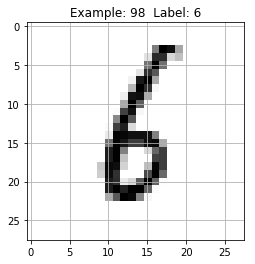

In [7]:
# Try it
display_image(98)

### Define the model

In [8]:
# As the data is too much for one training, split in mini-batches (partitions)
batch_size = 100

# Number of batches
m = int(n/batch_size)

### Network Topology

In [9]:
# Three hidden layers
# Number of nodes in each hidden layer
nodes_hl1 = 500
nodes_hl2 = 500
nodes_hl3 = 500

In [10]:
# Number of classes in output layer
classes = 10

# Number of epochs
epochs = 15

# Learning rate
lr = 0.001

### Tensors

In [11]:
# Array placeholders for input and output data
# needed, as we do not know the size of one mini-batch, it will be determined automatically
# Using small batches of random data is called stochastic training 
# we do it, as using the whole data set at once is expensive
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

### TF Computation Graph

In [12]:
def build_graph(x):
    # Assign random values to weights and biases at each hidden layer, as well as at the output layer
    # first hidden layer
    hl1 = {'w':tf.Variable(tf.random_normal([784, nodes_hl1])),
           'b':tf.Variable(tf.random_normal([nodes_hl1]))}
    # second hidden layer
    hl2 = {'w':tf.Variable(tf.random_normal([nodes_hl1, nodes_hl2])),
           'b':tf.Variable(tf.random_normal([nodes_hl2]))}
    # third hidden layer
    hl3 = {'w':tf.Variable(tf.random_normal([nodes_hl2, nodes_hl3])),
           'b':tf.Variable(tf.random_normal([nodes_hl3]))}
    # output 
    out = {'w':tf.Variable(tf.random_normal([nodes_hl3, classes])),
           'b':tf.Variable(tf.random_normal([classes]))}

    # Start feed forward
    # y = {X} * {W} + b
    # tf.matmul() - a function for multiplication of matrices
    # relu - the activation function for a node (see the graph below)
    # softmax() - alternative activation function, applied to the output nodes
    l1 = tf.matmul(x,hl1['w'])
    l1 = tf.add(l1, hl1['b'])
    l1 = tf.nn.relu(l1)

    l2 = tf.matmul(l1,hl2['w'])
    l2 = tf.add(l2, hl2['b'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hl3['w']), hl3['b'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,out['w']) + out['b']

    return output

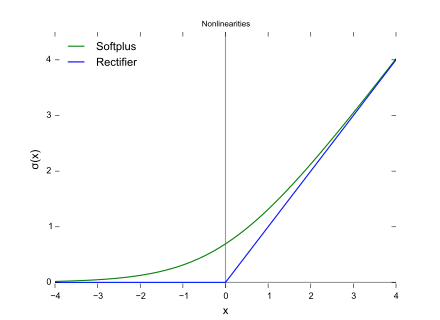


                                                Activation Function

In [13]:
# Validation function - will be used during the training
def validate(predicted, expected):
    correct = tf.equal(tf.argmax(predicted, 1), tf.argmax(expected, 1))
    print(correct)
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({x:data.test.images, y:data.test.labels}))   

### Training Session

In [14]:
# Training process set up will run in a TensorFlow Session
def train(x):
    print(x)
    # Start iteration of prediction using the computation graph above
    prediction = build_graph(x)
    
    # estimate the error/cost/loss 
    # based on the probability that the classes are mutually exclusive, so labels are informative
    
    # cost has the value we try to minimize by manipulating the weights
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y) )
    
    # minimise the cost by optimization function
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    # Create session    
    with tf.Session() as sess:
        # initialize the variables we created
        sess.run(tf.global_variables_initializer())   
        
        # start iterations for each epoch
        for epoch in range(epochs):
            epoch_loss = 0
            # same for each batch (partition of our data)
            for _ in range(m):
                # get the next batch of random data of size n
                epoch_x, epoch_y = data.train.next_batch(batch_size)
                # feeding the placeholders for x and y
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch ', epoch, ' out of ', epochs,'completed,  loss:', epoch_loss)
            # print('y', epoch_y)
            
        #Validate the accuracy
        validate(prediction, y)
          

In [15]:
# Run 
train(x)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.
Epoch  0  out of  15 completed,  loss: 1503430.8411254883
Epoch  1  out of  15 completed,  loss: 366757.57840156555
Epoch  2  out of  15 completed,  loss: 200184.84847056866
Epoch  3  out of  15 completed,  loss: 112513.9925378561
Epoch  4  out of  15 completed,  loss: 67311.8980807066
Epoch  5  out of  15 completed,  loss: 41063.01809600601
Epoch  6  out of  15 completed,  loss: 27962.117005163134
Epoch  7  out of  15 completed,  loss: 23644.606251975754
Epoch  8  out of  15 completed,  loss: 19563.970001476406
Epoch  9  out of  15 completed,  loss: 18176.617964684494
Epoch  10  out of  15 completed,  loss: 16282.734410718083
Epoch  11  out of  15 completed,  loss: 13786.81529321149
Epoch  12  out of  15 completed,  loss: 9947.098419036567
Epoch  13  out of  15 completed,  loss: 11984.316901244485
Epoch  14  out of  15 completed,  loss: 15218.078136625054
Tens

### Testing

In [23]:
# Try a random image from the database
K = ran.randint(0, 9999) 

# Load one of the training examples - K
x_test = data.test.images[K,:].reshape(1,784)
y_test = data.test.labels[K,:].reshape(1, 10)

In [24]:
print(y_test)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


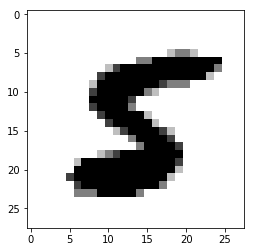

In [27]:
# Plot image K
img = data.test.images[K]
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [28]:
data.test.images[K,:].shape

(784,)

In [29]:
print(data.test.images[K,:])

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.       

### Validation

In [30]:
sess = tf.Session()
prediction = sess.run(tf.argmax(y_test, 1), feed_dict={x: [img]})
print(y_test)
print('Neural Network predicted', prediction[0])
print('Real label is:', np.argmax(data.test.labels[K]))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Neural Network predicted 5
Real label is: 5
